# Micro Credit Loan Model

## Data Set Information:

### Problem Statement: 

## Importing the required libraries:

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder,StandardScaler,power_transform,MinMaxScaler,PowerTransformer
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [216]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('Micro_credit.csv')
df.head()

col_num  label       msisdn    aon  daily_decr30  daily_decr90  rental30  \
0        1      0  21408I70789  272.0   3055.050000   3065.150000    220.13   
1        2      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   
2        3      1  17943I70372  535.0   1398.000000   1398.000000    900.13   
3        4      1  55773I70781  241.0     21.228000     21.228000    159.42   
4        5      1  03813I82730  947.0    150.619333    150.619333   1098.90   

   rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    260.13                2.0                0.0              1539   
1   3691.26               20.0                0.0              5787   
2    900.13                3.0                0.0              1539   
3    159.42               41.0                0.0               947   
4   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

In [217]:
#Dropping the col_num from the dataset , we don't need column number
df.drop('col_num',axis = 1,inplace= True)

## EDA (Exploratory Data Analysis):

In [218]:
df.shape

(209593, 36)

The dataset contains 209593 rows and 36 columns

In [219]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

we can see that 'msisdn','pcircle' and 'pdate' columns has object datatypes

In [220]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
label                   209593 non-null int64
msisdn                  209593 non-null object
aon                     209593 non-null float64
daily_decr30            209593 non-null float64
daily_decr90            209593 non-null float64
rental30                209593 non-null float64
rental90                209593 non-null float64
last_rech_date_ma       209593 non-null float64
last_rech_date_da       209593 non-null float64
last_rech_amt_ma        209593 non-null int64
cnt_ma_rech30           209593 non-null int64
fr_ma_rech30            209593 non-null float64
sumamnt_ma_rech30       209593 non-null float64
medianamnt_ma_rech30    209593 non-null float64
medianmarechprebal30    209593 non-null float64
cnt_ma_rech90           209593 non-null int64
fr_ma_rech90            209593 non-null int64
sumamnt_ma_rech90       209593 non-null int64
medianamnt_ma_rech90    209593 non-nul

In [222]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no missing values in any columns

In [223]:
#Lets check the skewness of the data
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

No column is in the skewness range of -0.5 to +0.5

In [224]:
# Descriptive analysis or summary statistics
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    20959

 we can see that outliers present in 'aon','daily_decr90' and every other columns, Since there large gap between 75th percentile and max

In [225]:
#we can see pcircile is having one unique value and and it is a object data type
pd.unique(df['pcircle'])

array(['UPW'], dtype=object)

In [226]:
#picrcle is having one unique value
#msisdn column is mobile number 
#pdate column is daate
#These columns are also useless for this model, hence lets drop these three columns
df.drop(['msisdn','pcircle','pdate'],axis =1,inplace= True)

These columns have been removed

## Data Visualizaion :

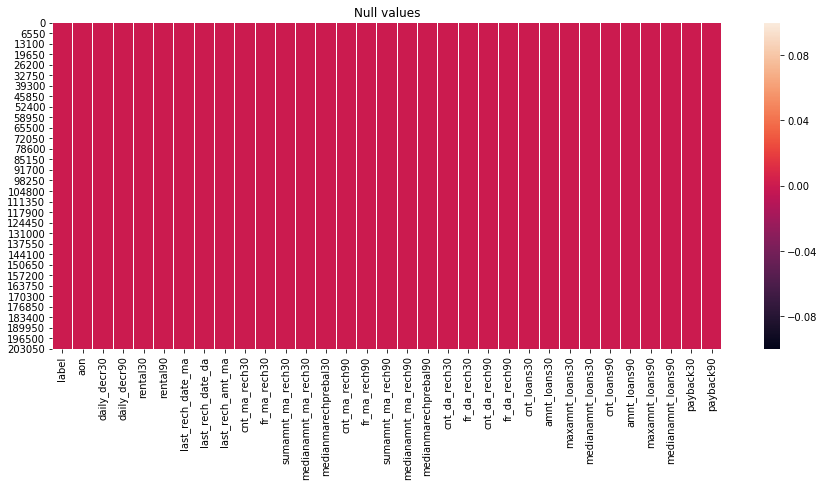

In [227]:
#checking the missing values with visualization technique
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

There are no missing values in any columns

In [228]:
#Lets check for class imbalance problem
#Since all the values in "Label" column is zero and one, we can use this formula.
sum(df['label'])/len(df['label'])

0.875177129007171

The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.

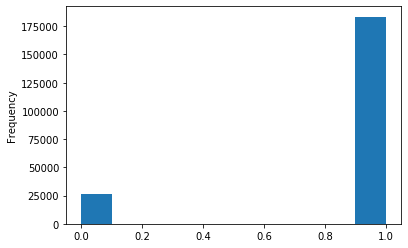

In [229]:
# we can see that Class is imbalnaced
df['label'].plot(kind = 'hist')
plt.show()

we see that there is class imbalnce problem in this dataset

lets check the correlation

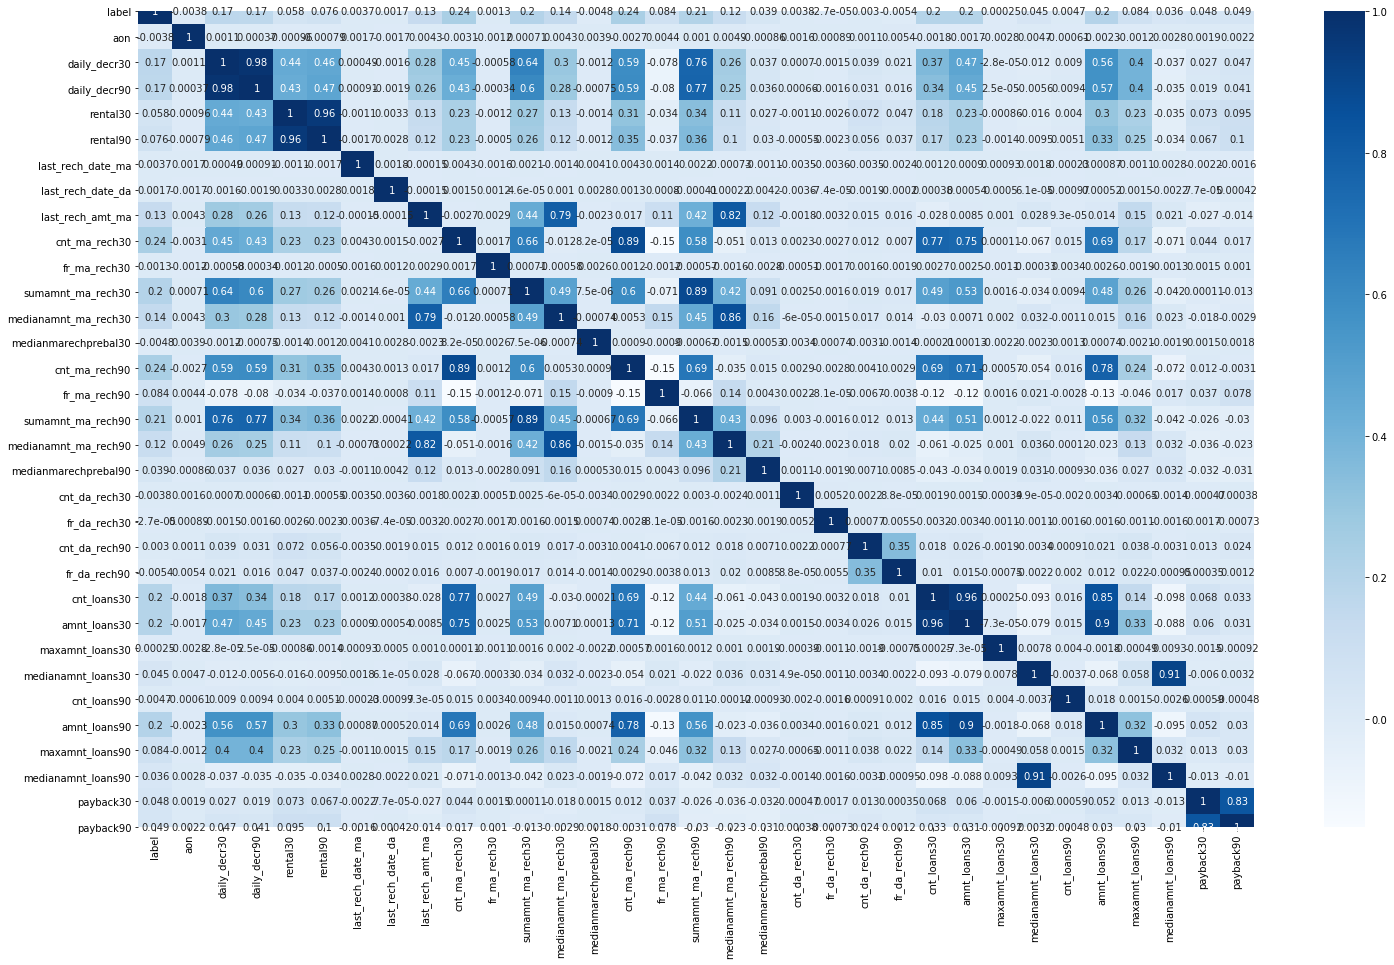

In [230]:
#correlation
fig = plt.figure(figsize=(25,15))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

In [231]:
cor_matrix['label'].sort_values(ascending = False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon       

we can see that almost all the columns have very less correlation with target variable

Last 12 values have very 0.00 correlation , we can delete these rows

In [232]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

### Univariate Analysis

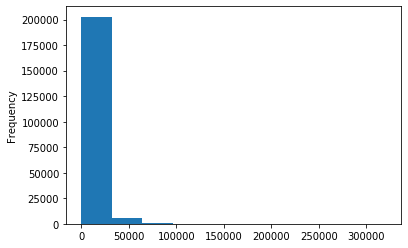

In [233]:
#We can see that this column is Right Skewed
df['daily_decr90'].plot.hist()
plt.show()

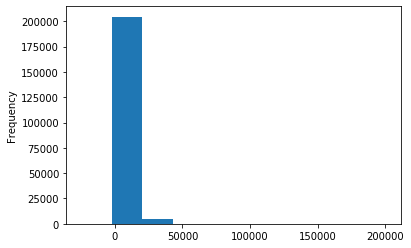

In [234]:
#We can see that this column is Right Skewed
df['rental90'].plot.hist()
plt.show()

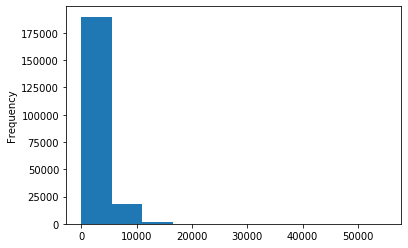

In [235]:
#We can see that this column is Right Skewed
df['last_rech_amt_ma'].plot.hist()
plt.show()

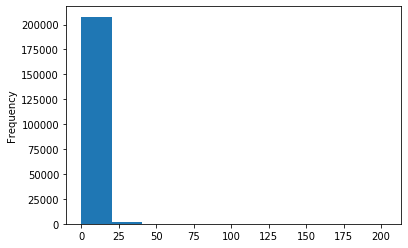

In [236]:
#We can see that this column is Right Skewed
df['cnt_ma_rech30'].plot.hist()
plt.show()

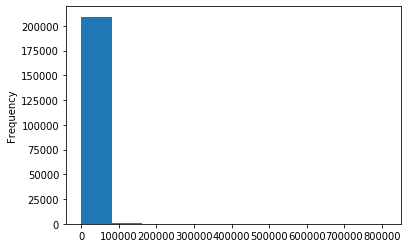

In [237]:
#We can see that this column is Right Skewed
df['sumamnt_ma_rech30'].plot.hist()
plt.show()

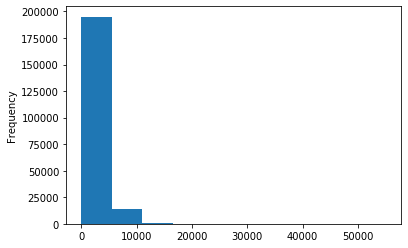

In [238]:
#We can see that this column is Right Skewed
df['medianamnt_ma_rech30'].plot.hist()
plt.show()

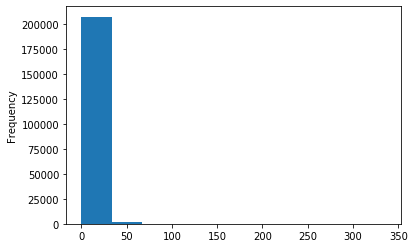

In [239]:
#We can see that this column is Right Skewed
df['cnt_ma_rech90'].plot.hist()
plt.show()

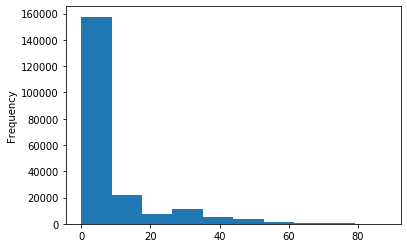

In [240]:
#We can see that this column is Right Skewed
df['fr_ma_rech90'].plot.hist()
plt.show()

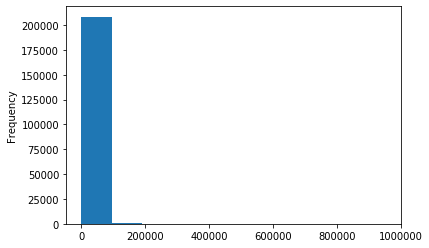

In [241]:
#We can see that this column is Right Skewed
df['sumamnt_ma_rech90'].plot.hist()
plt.show()

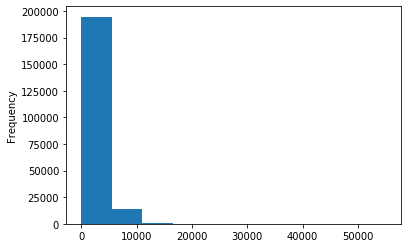

In [242]:
#We can see that this column is Right Skewed
df['medianamnt_ma_rech90'].plot.hist()
plt.show()

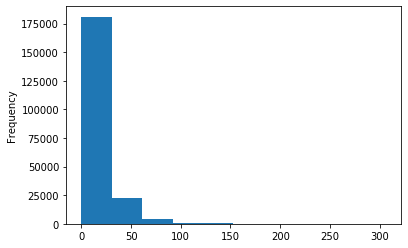

In [243]:
#We can see that this column is Right Skewed
df['amnt_loans30'].plot.hist()
plt.show()

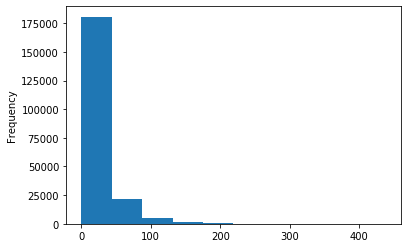

In [244]:
#We can see that this column is Right Skewed
df['amnt_loans90'].plot.hist()
plt.show()

### Bivariate Analysis

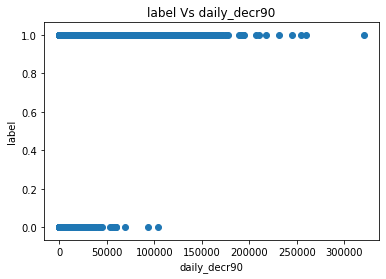

In [245]:
#Lets plot this column against the target variable
plt.scatter(df['daily_decr90'],df['label'])
plt.xlabel('daily_decr90')
plt.ylabel('label')
plt.title('label Vs daily_decr90')
plt.show()

we can see there is imbalance in data when plotted witj label column

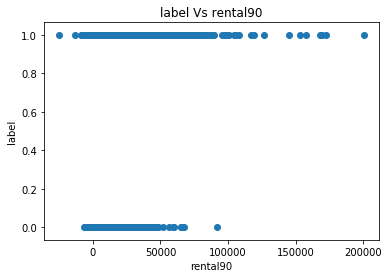

In [246]:
#Lets plot this column against the target variable
plt.scatter(df['rental90'],df['label'])
plt.xlabel('rental90')
plt.ylabel('label')
plt.title('label Vs rental90')
plt.show()

we can see there is imbalance in data when plotted witj label column

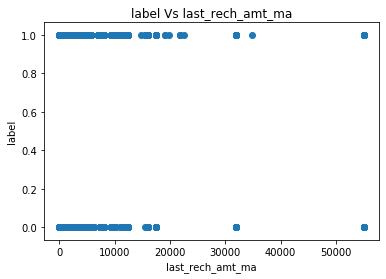

In [247]:
#Lets plot this column against the target variable
plt.scatter(df['last_rech_amt_ma'],df['label'])
plt.xlabel('last_rech_amt_ma')
plt.ylabel('label')
plt.title('label Vs last_rech_amt_ma')
plt.show()

we can see there is imbalance in data when plotted with label column

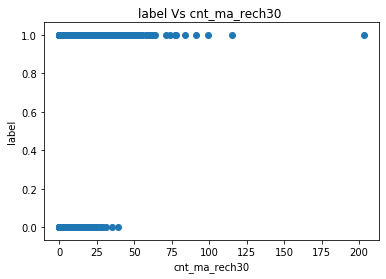

In [248]:
#Lets plot this column against the target variable
plt.scatter(df['cnt_ma_rech30'],df['label'])
plt.xlabel('cnt_ma_rech30')
plt.ylabel('label')
plt.title('label Vs cnt_ma_rech30 ')
plt.show()

we can see there is imbalance in data when plotted witj label column

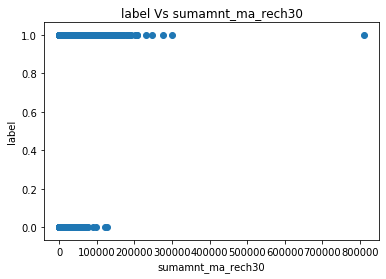

In [249]:
#Lets plot this column against the target variable
plt.scatter(df['sumamnt_ma_rech30'],df['label'])
plt.xlabel('sumamnt_ma_rech30')
plt.ylabel('label')
plt.title('label Vs sumamnt_ma_rech30')
plt.show()

we can see there is imbalance in data when plotted with label column

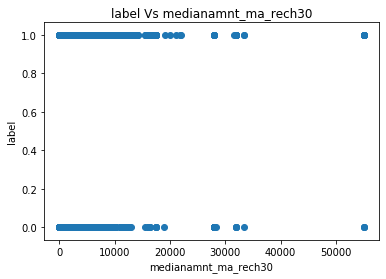

In [250]:
#Lets plot this column against the target variable
plt.scatter(df['medianamnt_ma_rech30'],df['label'])
plt.xlabel('medianamnt_ma_rech30')
plt.ylabel('label')
plt.title('label Vs medianamnt_ma_rech30')
plt.show()

we can see there is not much imbalance in data when plotted with label column

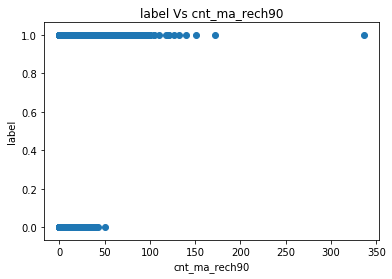

In [251]:
#Lets plot this column against the target variable
plt.scatter(df['cnt_ma_rech90'],df['label'])
plt.xlabel('cnt_ma_rech90')
plt.ylabel('label')
plt.title('label Vs cnt_ma_rech90')
plt.show()

we can see there is imbalance in data when plotted with label column

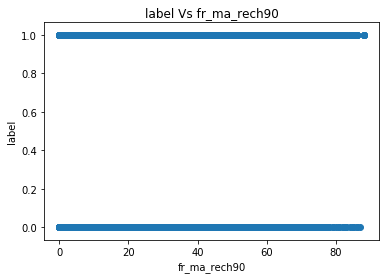

In [252]:
#Lets plot this column against the target variable
plt.scatter(df['fr_ma_rech90'],df['label'])
plt.xlabel('fr_ma_rech90')
plt.ylabel('label')
plt.title('label Vs fr_ma_rech90')
plt.show()

we can see there balance in data when plotted with label column

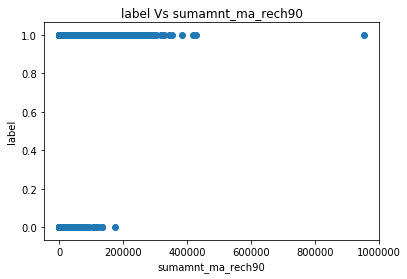

In [253]:
#Lets plot this column against the target variable
plt.scatter(df['sumamnt_ma_rech90'],df['label'])
plt.xlabel('sumamnt_ma_rech90')
plt.ylabel('label')
plt.title('label Vs sumamnt_ma_rech90')
plt.show()

we can see there is imbalance in data when plotted with label column

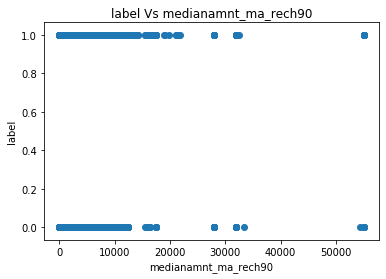

In [254]:
#Lets plot this column against the target variable
plt.scatter(df['medianamnt_ma_rech90'],df['label'])
plt.xlabel('medianamnt_ma_rech90')
plt.ylabel('label')
plt.title('label Vs medianamnt_ma_rech90')
plt.show()

we can see there is not much imbalance in data when plotted with label column

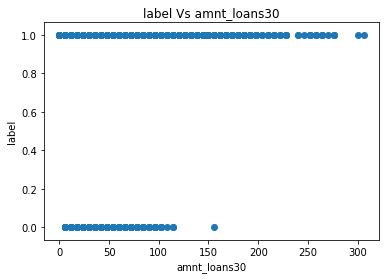

In [255]:
#Lets plot this column against the target variable
plt.scatter(df['amnt_loans30'],df['label'])
plt.xlabel('amnt_loans30')
plt.ylabel('label')
plt.title('label Vs amnt_loans30')
plt.show()

we can see there is imbalance in data when plotted with label column

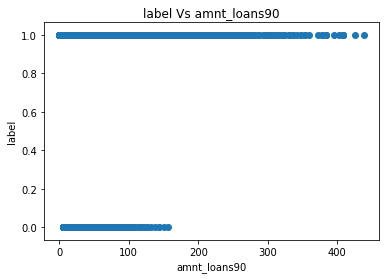

In [256]:
#Lets plot this column against the target variable
plt.scatter(df['amnt_loans90'],df['label'])
plt.xlabel('amnt_loans90')
plt.ylabel('label')
plt.title('label Vs amnt_loans90')
plt.show()

we can see there is imbalance in data when plotted with label column

### Multivariate Analysis

In [257]:
#this plot will show us univariate analysis and bivariate analysis of all the columnst
#sns.pairplot(df)

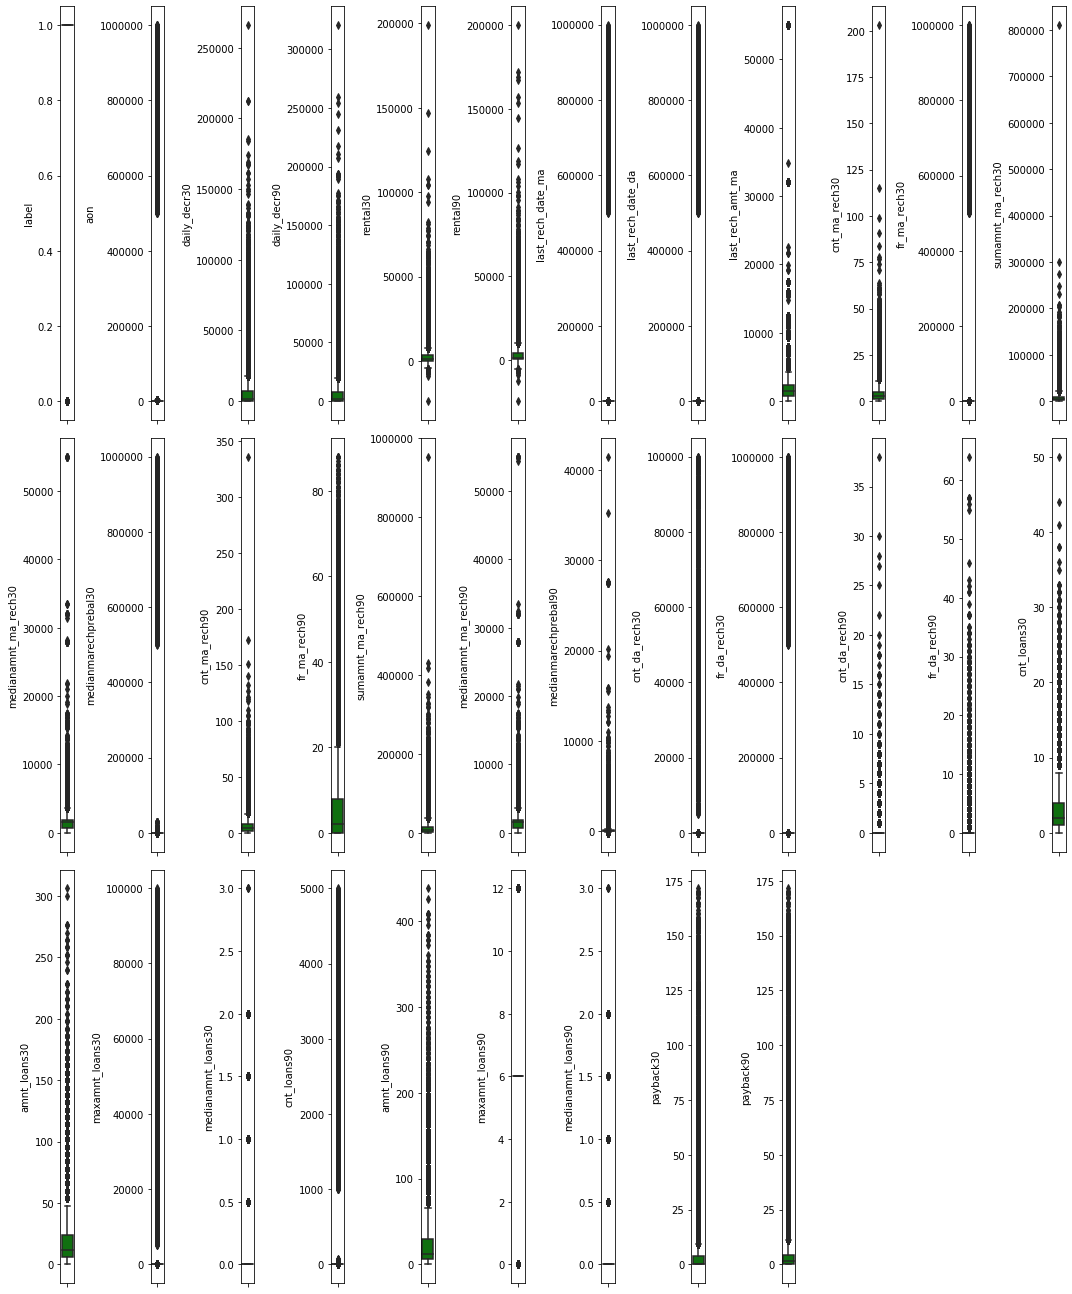

In [258]:
# lets check for outliers among all the columns
collist =df.columns
ncol = 12
nrows = 10
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient = 'v')
    plt.tight_layout()


we can see that ouliers are present in almost every columns

In [259]:

# Lets check the distribution
collist =df.columns
ncol = 6
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

No column is normally distributed

## Data Preprocessing:

In [260]:
#lets remove the columns which are having correlation less than 0.00 with target variable
cor_matrix['label'].sort_values(ascending = False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon       

In [261]:
#Lets Remove last 12 columns which are correlation less than 0.05 with the target variable
#'daily_decr30' and 'daily_decr90' are having 0.98 correlation between each other, hence removing one.
#'rental30' and 'rental90' are having 0.96 correlation between each other, hence removing one.
#'cnt_loans30' and 'amnt_loans30' are having 0.96 correlation between each other, hence removing one.
df.drop(['payback90','payback30','medianamnt_loans30','medianmarechprebal90','medianamnt_loans90','cnt_loans90','cnt_da_rech30','last_rech_date_ma','cnt_da_rech90','last_rech_date_da','fr_ma_rech30','maxamnt_loans30','fr_da_rech30','aon','medianmarechprebal30','fr_da_rech90','daily_decr30','rental30','cnt_loans30','maxamnt_loans90'] ,axis = 1,inplace = True)

In [262]:
cor_mat = df.corr()
cor_mat['label'].sort_values(ascending = False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
rental90                0.075521
Name: label, dtype: float64

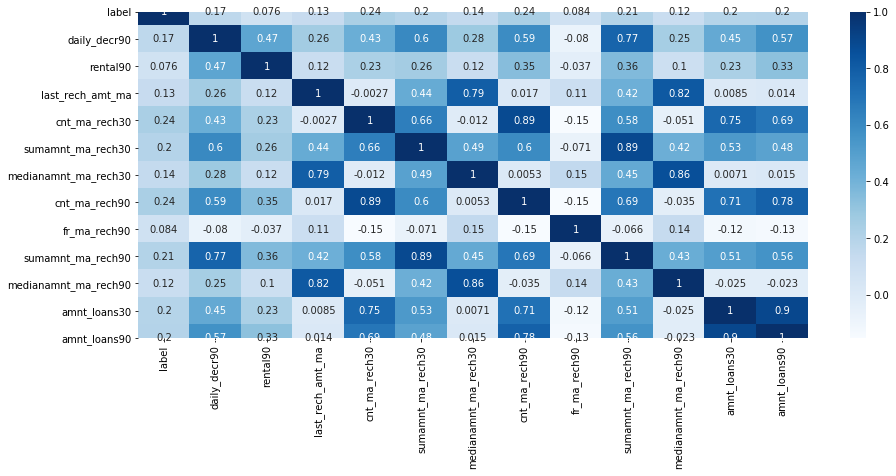

In [263]:
#correlation
fig = plt.figure(figsize=(15,6))
cor_mat = df.corr(method='pearson')
sns.heatmap(cor_mat,annot = True,cmap = 'Blues')
plt.show()

In [264]:
# lets check for outliers among all the columns
collist =df.columns
ncol = 12
nrows = 10
k = 0
plt.figure(figsize= (15,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,k+1)
    k += 1
    sns.boxplot(df[collist[i]],color='green',orient = 'v')
    plt.tight_layout()


In [265]:
collist =df.columns
ncol = 6
nrows = 10
k = 0
plt.figure(figsize= (15,20))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,k+1)
    k = k+ 1
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

In [266]:
#since all the column is right skewed, lets use IQR method to deal with outliers
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 3)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 3)
    return(lower_boundary,upper_boundary)

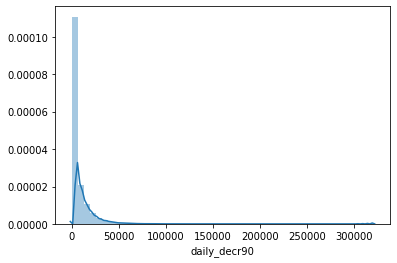

In [267]:
#before oulier removal
sns.distplot(df['daily_decr90'])

In [268]:
outliers_IQR3(df,'daily_decr90')

(-23237.60200000003, 31083.08400000004)

In [269]:
df.loc[df['daily_decr90']>=31083.08400000004,'daily_decr90']=31083.08400000004
df.loc[df['daily_decr90'] <= -23237.60200000003,'daily_decr90']=-23237.60200000003

In [270]:
#after oulier removal
sns.distplot(df['daily_decr90'])

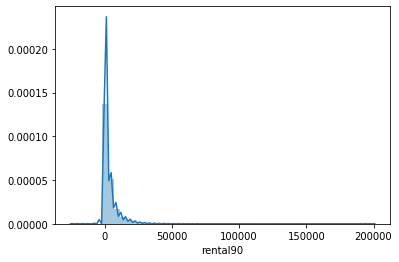

In [271]:
#before oulier removal
sns.distplot(df['rental90'])

In [272]:
outliers_IQR3(df,'rental90')

(-11404.33, 15906.380000000001)

In [273]:
df.loc[df['rental90']>=15906.380000000001,'rental90']=15906.380000000001
df.loc[df['rental90'] <= -11404.33,'rental90']=-11404.33

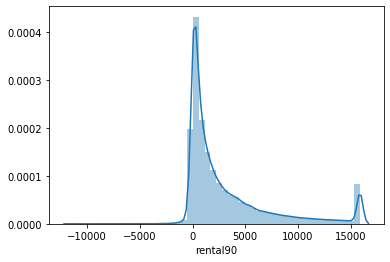

In [274]:
#after oulier removal
sns.distplot(df['rental90'])

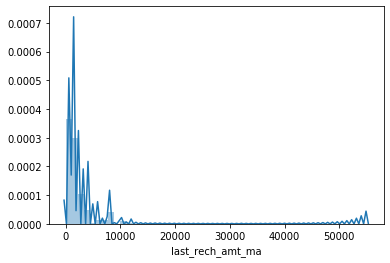

In [275]:
#before oulier removal
sns.distplot(df['last_rech_amt_ma'])

In [276]:
outliers_IQR3(df,'last_rech_amt_ma')

(-3847.0, 6926.0)

In [277]:
df.loc[df['last_rech_amt_ma']>=6926.0,'last_rech_amt_ma']=6926.0
df.loc[df['last_rech_amt_ma'] <= -3847.0,'last_rech_amt_ma']=-3847.0

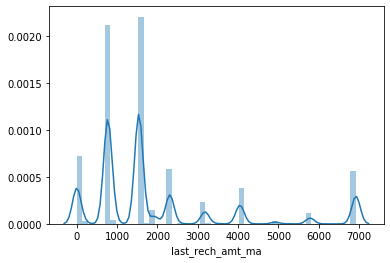

In [278]:
#after oulier removal
sns.distplot(df['last_rech_amt_ma'])

In [279]:
#writing a function to directly repalace outliers since all the coulmns are right skewed 
def outliers_reduction(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 3)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 3)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary
    #sns.distplot[df[feature_name]]

In [280]:
#before oulier removal
outliers_reduction(df,'cnt_ma_rech30')

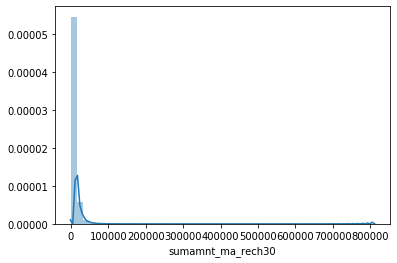

In [281]:
sns.distplot(df['sumamnt_ma_rech30'])

In [282]:
outliers_reduction(df,'sumamnt_ma_rech30')

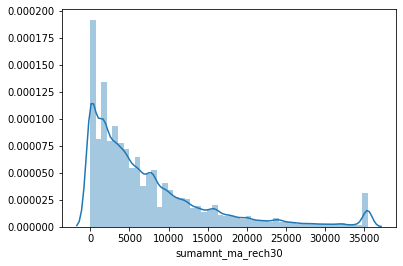

In [283]:
#after oulier removal
sns.distplot(df['sumamnt_ma_rech30'])

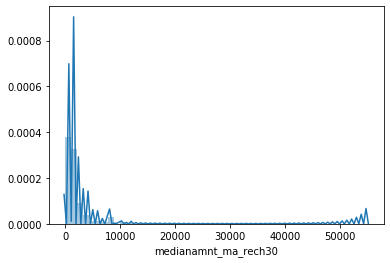

In [284]:
#before oulier removal
sns.distplot(df['medianamnt_ma_rech30'])

In [285]:
outliers_reduction(df,'medianamnt_ma_rech30')

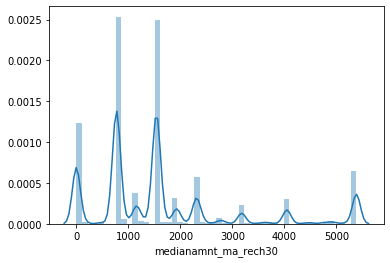

In [286]:
#after oulier removal
sns.distplot(df['medianamnt_ma_rech30'])

In [287]:
outliers_reduction(df,'cnt_ma_rech90')
outliers_reduction(df,'fr_ma_rech90')
outliers_reduction(df,'sumamnt_ma_rech90')
outliers_reduction(df,'medianamnt_ma_rech90')
outliers_reduction(df,'amnt_loans30')
outliers_reduction(df,'amnt_loans90')

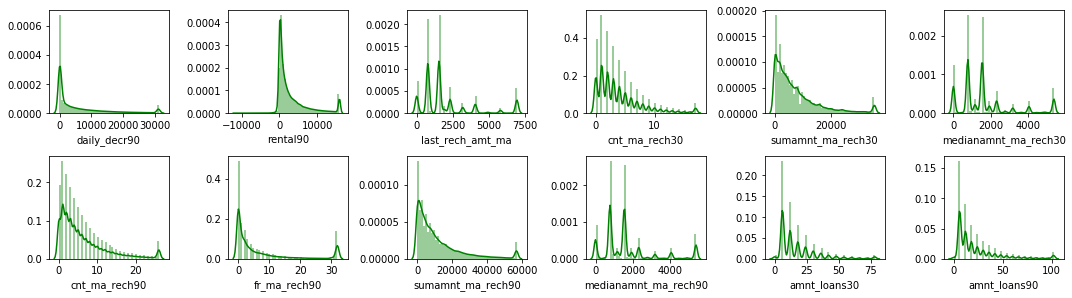

In [288]:
collist =df.columns
ncol = 6
nrows = 10
k = 0
plt.figure(figsize= (15,20))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,k+1)
    k += 1
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

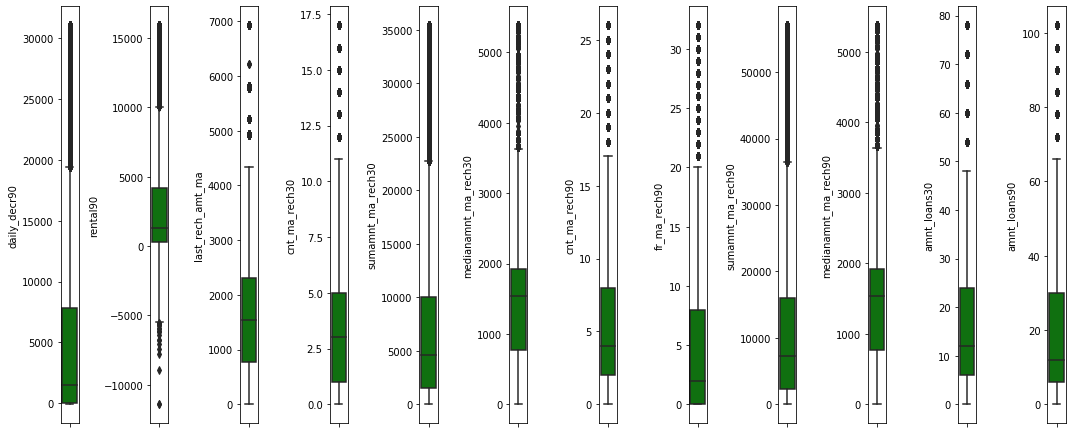

In [289]:
#most of the outliers have been removed, still some are there
collist = df.columns
ncol = 12
nrows = 10
k =0
plt.figure(figsize= (15,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,k+1)
    k += 1
    sns.boxplot(df[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

In [290]:
#we can still outliers on these 6 columns 'rental90','last_rech_amt_ma','medianamnt_ma_rech30','medianamnt_ma_rech90','amnt_loans30','amnt_loans90'

In [291]:
#Since some columns looks like normal distributed, we will use this function for some columns
def outliers_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary
    

In [292]:
#lets reduce the outliers using this function
outliers_normally(df,'rental90')
outliers_normally(df,'last_rech_amt_ma')
outliers_normally(df,'medianamnt_ma_rech30')

In [293]:
# Skewness reduction
Y = df['label']
X = df.drop('label',axis = 1)

In [294]:
X.skew()

daily_decr90            1.785188
rental90                1.758201
last_rech_amt_ma        1.656548
cnt_ma_rech30           1.496964
sumamnt_ma_rech30       1.724505
medianamnt_ma_rech30    1.400876
cnt_ma_rech90           1.516680
fr_ma_rech90            1.650263
sumamnt_ma_rech90       1.760046
medianamnt_ma_rech90    1.431250
amnt_loans30            1.846304
amnt_loans90            1.829131
dtype: float64

None of the columns are in the skewness range of -0.5 to +0.5

In [295]:
#Reducing the skewness using cbrt method for first column, since it was possible by other methods
X['daily_decr90'] = np.cbrt(X['daily_decr90'])

In [296]:
#Reducing the skewness using power transform method for rest of the columns
collist = X.columns
for i in range(1,len(collist)):
    arr = X[collist[i]].values
    arr = arr.reshape(-1,1)
    arr = power_transform(arr)
    X[collist[i]] = arr 

In [297]:
X.skew()

daily_decr90            0.429955
rental90                0.076053
last_rech_amt_ma       -0.172648
cnt_ma_rech30          -0.008261
sumamnt_ma_rech30      -0.372243
medianamnt_ma_rech30   -0.377170
cnt_ma_rech90          -0.013313
fr_ma_rech90            0.128961
sumamnt_ma_rech90      -0.274652
medianamnt_ma_rech90   -0.243194
amnt_loans30            0.005507
amnt_loans90           -0.002188
dtype: float64

In [298]:
#Scaling the data
scaler  = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

daily_decr90  rental90  last_rech_amt_ma  cnt_ma_rech30  sumamnt_ma_rech30  \
0      0.529763  0.883979          0.539110       0.364150           0.437781   
1      0.764585  0.915063          0.929565       0.227555           0.543941   
2      0.436787  0.890791          0.539110       0.227555           0.343479   
3      0.202924  0.882742          0.439866       0.000000           0.000000   
4      0.273859  0.892724          0.637893       0.705567           0.827115   

   medianamnt_ma_rech30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0              0.577617       0.310340      0.921834           0.383896   
1              1.000000       0.193271      0.000000           0.474361   
2              0.577617       0.193271      0.000000           0.302993   
3              0.000000       0.193271      0.000000           0.255837   
4              0.690770       0.643132      0.406915           0.751248   

   medianamnt_ma_rech90  amnt_loans30  amnt_loans90  
0              0.565580      0.568665      0.586749  
1              1.000000      0.568665      0.586749  
2              0.565580      0.426776      0.453102  
3              0.451970      0.568665      0.586749  
4              0.754286      0.851597      0.831680

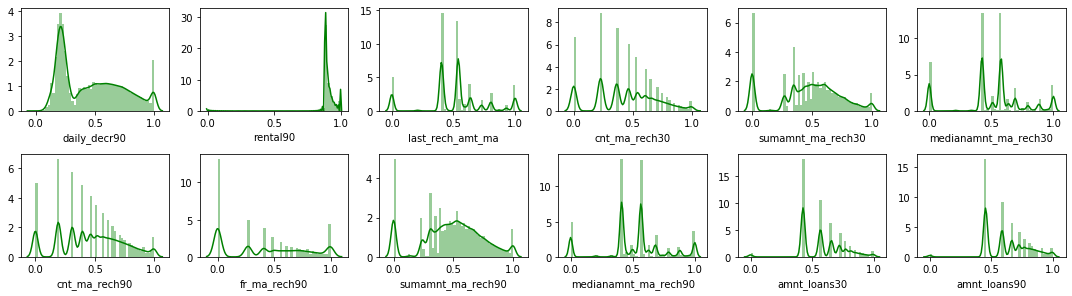

In [299]:
# Lets check the distribution after outlier removal and skewness reduction
collist = X.columns
ncol = 6
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(X[collist[i]],color='green')
    plt.tight_layout()

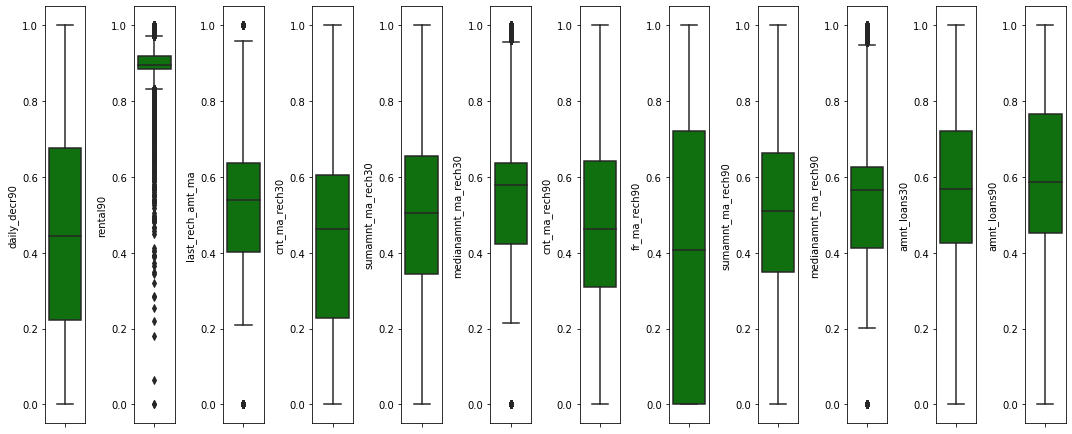

In [300]:
#ouliers havr been removed
collist = X.columns
ncol = 12
nrows = 10
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(X[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

In [301]:
y = Y.values

In [302]:
X['label'] = y

In [303]:
df_final = X.copy()

## Class Imbalance Problem:

In [304]:
y = df_final['label']
x = df_final.drop('label',axis = 1)

In [305]:
#we can see there is class imbalanve problem in this dataset
y.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [306]:
# First lets check for F1 score with logistic regression

In [307]:
#train test split
x_train,x_test,y_train,y_test =  train_test_split(x, y, test_size=0.25, random_state=48)

In [308]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8805893242237447
[[  493  6045]
 [  212 45649]]
              precision    recall  f1-score   support

           0       0.70      0.08      0.14      6538
           1       0.88      1.00      0.94     45861

    accuracy                           0.88     52399
   macro avg       0.79      0.54      0.54     52399
weighted avg       0.86      0.88      0.84     52399



###### we can see that f1 score for "0" is very less  and "1" is high in  logistic regression, because of class imbalnce problem

f1 score is only 14% for '0' and 94% for '1'

## Method1 :Undersampling

In [309]:
# Class count
count_class_1, count_class_0 = df_final.label.value_counts()

# Divide by class
df_class_0 = df_final[df_final['label'] == 0]
df_class_1 = df_final[df_final['label'] == 1]


In [310]:
count_class_1

183431

In [311]:
count_class_0

26162

In [312]:
# Undersample 0-class and concat the DataFrames of both class
df_class_1_under = df_class_1.sample(count_class_0)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(df_test_under.label.value_counts())

Random under-sampling:
1    26162
0    26162
Name: label, dtype: int64


In [313]:
x = df_test_under.drop('label',axis='columns')
y = df_test_under['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.23, random_state=42, stratify=y)

In [314]:
# Number of classes in training Data
y_train.value_counts()

1    20145
0    20144
Name: label, dtype: int64

In [315]:
y_test.value_counts()

0    6018
1    6017
Name: label, dtype: int64

In [316]:
# Applying the Logistic regression algorithm after undersampling method
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
accu = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('The accuracy is {}'.format(accu))
cv = cross_val_score(lg,x,y,cv =5)
print(cv.mean())
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1))   

[[4586 1432]
 [1585 4432]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      6018
           1       0.76      0.74      0.75      6017

    accuracy                           0.75     12035
   macro avg       0.75      0.75      0.75     12035
weighted avg       0.75      0.75      0.75     12035

The accuracy is 0.7493144993768176
0.7519301998360634
f1 score for 0 is 0.7524817458364099 
f1 score for 1 is 0.7460651460314789 


Now the f1 score of logistic regression has raised from 14% to 75% for '0'

## Method2: Oversampling

Oversampling method just copies the existing class variables and makes count 1 and 0 equal

Here we have less count_class_0 and more count_class_1, so the oversampling method makes count_class_0 equal to count_class_1 by copying the existing 0 class

In [317]:
count_class_0

26162

In [318]:
count_class_1

183431

In [319]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_1, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_test_over.label.value_counts())

Random over-sampling:
1    183431
0    183431
Name: label, dtype: int64


In [320]:
df_test_over.shape

(366862, 13)

In [321]:
x = df_test_over.drop('label',axis='columns')
y = df_test_over['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.23, random_state=48, stratify=y)

In [322]:
y_train.value_counts()

1    141242
0    141241
Name: label, dtype: int64

In [323]:
# Applying the Logistic regression algorithm after oversampling method
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
accu = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('The accuracy is {}'.format(accu))
cv = cross_val_score(lg,x,y,cv =5)
print(cv.mean())
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1))  

[[32382  9808]
 [10922 31267]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     42190
           1       0.76      0.74      0.75     42189

    accuracy                           0.75     84379
   macro avg       0.75      0.75      0.75     84379
weighted avg       0.75      0.75      0.75     84379

The accuracy is 0.7543227580322118
0.751963954665978
f1 score for 0 is 0.7575268439890518 
f1 score for 1 is 0.7510328593389701 


 after oversampling method f1 score in incresed form 14% to 75%

## Method3: SMOTE

To install imbalanced-learn library use "pip install imbalanced-learn" command

In [324]:
#!pip install imbalanced-learn

In [325]:
x = df_final.drop('label',axis='columns')
y = df_final['label']

In [326]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

1    183431
0    183431
Name: label, dtype: int64

In [327]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.23, random_state=48, stratify=y_sm)

In [328]:
# Number of classes in training Data
y_train.value_counts()

1    141242
0    141241
Name: label, dtype: int64

In [329]:
# Applying the Logistic regression algorithm after SMOT method
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
accu = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('The accuracy is {}'.format(accu))
cv = cross_val_score(lg,x,y,cv =5)
print(cv.mean())
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1)) 

[[32223  9967]
 [11026 31163]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75     42190
           1       0.76      0.74      0.75     42189

    accuracy                           0.75     84379
   macro avg       0.75      0.75      0.75     84379
weighted avg       0.75      0.75      0.75     84379

The accuracy is 0.7512058687588143
0.880754601035504
f1 score for 0 is 0.7542925361954144 
f1 score for 1 is 0.748040662994035 


 f1 is score incresed from 14% to 75% in all three methods used

SMOTE method is always a better option than OverSampling Method , becuase it create new samples from the existing samples. 
SMOTE uses K-nearest-Nieghbour  algorithm.

## Model Selection

Since the our data is ready lets start with model selection

In [330]:
dtc = DecisionTreeClassifier()
lg = LogisticRegression()
gnb = GaussianNB()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

In [331]:
model_list = [dtc,lg,gnb,rf,ada]
least_difference = []
for m in model_list:
    print('\n')
    print(m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    accu = accuracy_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('The accuracy of {} is {}'.format(m,accu))
    cv = cross_val_score(m,x,y,cv =5)
    diffrence = np.abs(cv.mean()- f1_score(y_test,pred))
    least_difference.append((m,diffrence))
    print("cross val score :",  cv.mean())
    for i in ([0,1]):
        f1 = f1_score(y_test,pred,pos_label=i)
        print("f1 score for {} is {} ".format(i,f1))   



DecisionTreeClassifier()
[[37216  4974]
 [ 5906 36283]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     42190
           1       0.88      0.86      0.87     42189

    accuracy                           0.87     84379
   macro avg       0.87      0.87      0.87     84379
weighted avg       0.87      0.87      0.87     84379

The accuracy of DecisionTreeClassifier() is 0.8710579646594532
cross val score : 0.8623665870840738
f1 score for 0 is 0.8724681170292573 
f1 score for 1 is 0.8696162787910744 


LogisticRegression()
[[32223  9967]
 [11026 31163]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75     42190
           1       0.76      0.74      0.75     42189

    accuracy                           0.75     84379
   macro avg       0.75      0.75      0.75     84379
weighted avg       0.75      0.75      0.75     84379

The accuracy of LogisticRegression() is 0.7512058687588143

Decision is having F1 score of 86% and cross val score 87% which is least diffrence

The score got incresed from 14% to 87% after the Class imbalace problem is Resolved

In [332]:
least_difference

[(DecisionTreeClassifier(), 0.007249691707000627),
 (LogisticRegression(), 0.13271393804146892),
 (GaussianNB(), 0.045922826284045426),
 (RandomForestClassifier(), 0.017846644596679173),
 (AdaBoostClassifier(), 0.1152546686704905)]

Since we have Decision Tree has the least difference between its cross val score and accuracy and f1 score, we can choose Decision tree classifer as our best classifir

## Hyper Parameter Tuning

In [333]:
# lets create the parameter list to pass in GridsearchCv

In [334]:
parameters = {'criterion' : ['gini','entropy'] ,'max_depth' : [3,4,5,6,7,8,10,25]
             ,'min_samples_split':[2,5,8,10,12,18],'max_features':['auto','sqrt'],'min_samples_leaf':[1,3,5,7,9]}

In [335]:
gsv = GridSearchCV(estimator= dtc , param_grid=parameters,cv =5)
gsv.fit(x_train,y_train) 

In [336]:
gsv.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [337]:
#we found that {'criterion': 'gini', 'max_depth': 25, 'max_features': 'auto','min_samples_leaf':1,'min_samples_split'}
#as best parameters for Decision Tree using Hyperparameter tuning

## Creating a Final Model as Decision Tree

In [338]:
final_mod = DecisionTreeClassifier(criterion= 'gini', max_depth= 25,max_features='auto', 
                                   min_samples_leaf= 1, min_samples_split= 2)
final_mod.fit(x_train,y_train)
pred = final_mod.predict(x_test)
accu =accuracy_score(y_test,pred)
print('The accuracy is {}'.format(accu*100))
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1))  

The accuracy is 87.13186930397374
f1 score for 0 is 0.8732903888344303 
f1 score for 1 is 0.8692846652059808 


## Saving the model:

In [339]:
import joblib
joblib.dump(final_mod,'micro_credit_final.obj')

['micro_credit_final.obj']

In [340]:
micro_credit_final = joblib.load('micro_credit_final.obj')

In [341]:
pred = micro_credit_final.predict(x_test)
pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [342]:
accuracy_score(y_test,pred)

0.8713186930397374

## AUC ROC curve :

Since we have random forest as our final , lets check out the auc roc curve and score

In [343]:
final_mod.score(x_train,y_train)

0.9567124393326324

In [344]:
y_pred_prob = final_mod.predict_proba(x_test)[:,1]
y_pred_prob

array([0.        , 1.        , 0.15436242, ..., 0.01758461, 1.        ,
       0.96727273])

In [345]:
fpr,tpr,thresholds  = roc_curve(y_test,y_pred_prob)

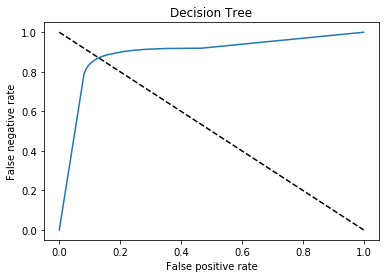

In [346]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'Decision Tree')
plt.xlabel('False positive rate')
plt.ylabel('False negative rate')
plt.title('Decision Tree')
plt.show()

In [347]:
final_mod.fit(x_train,y_train)
log_pred = final_mod.predict(x_test)
accu =accuracy_score(y_test,log_pred)
print(accu*100)
print("AUC ROC Score: ",roc_auc_score(y_test,log_pred))

87.67465838656537
AUC ROC Score:  0.876746427664523
